
<a id='opt-tax-amss'></a>
<div id="qe-notebook-header" style="text-align:right;">
        <a href="https://quantecon.org/" title="quantecon.org">
                <img style="width:250px;display:inline;" src="https://assets.quantecon.org/img/qe-menubar-logo.svg" alt="QuantEcon">
        </a>
</div>

# Tributação Ótima sem Dívida Contingente do Estado

## Conteúdo

- [Tributação Ótima sem Dívida Contingente do Estado](#Tributação-Ótima-sem-Dívida-Contingente-do-Estado)  
  - [Resumo](#Resumo)  
  - [Equilíbrio Competitivo com Impostos Distorcivos](#Equilíbrio-Competitivo-com-Impostos-Distorcivos)  
  - [Versão Recursiva do Modelo AMSS](#Versão-Recursiva-do-Modelo-AMSS)  
  - [Exemplos](#Exemplos)  

> *Devidamente traduzido, revisado e adaptado do [QuantEcon](https://quantecon.org/) pelos bolsistas CNPq Pedro Luiz H. Furtado e Jonas Aragão M. Corpes, sob a supervisão do Prof. Christiano Penna, do CAEN/UFC.*

## Resumo

Na [aula anterior](https://julia.quantecon.org/opt_tax_recur.html), descrevemos um modelo de
tributação ideal com dívidas contingentes do Estado devido a
Robert E. Lucas Jr. e Nancy Stokey [LS83](https://julia.quantecon.org/../zreferences.html#lucasstokey1983).

Aiyagari, Marcet, Sargent e Seppälä [[AMSS02](https://julia.quantecon.org/../zreferences.html#amss2002) (a seguir, AMSS)
estudaram a tributação ideal em um modelo sem dívida contingente do estado.

Nesta aula, nós iremos:

- Descrever suposições e conceitos de equilíbrio;
- Resolver o modelo;
- Implementar o modelo numericamente;
- Realizar algumas experiências políticas, e
- Comparar resultados com aqueles em um modelo de mercado completo correspondente.


Começamos com uma introdução ao modelo.

### Configuração

In [1]:
using InstantiateFromURL
github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0")
# github_project("QuantEcon/quantecon-notebooks-julia", version = "0.5.0", instantiate = true) # uncomment to force package installation

In [2]:
using LinearAlgebra, Statistics

## Equilíbrio Competitivo com Impostos Distorcivos

Muitos, mas nem todos, os aspectos da economia são idênticos aos da [economia de Lucas-Stokey](https://julia.quantecon.org/opt_tax_recur.html).

Vamos começar com coisas idênticas.

Para $ t \geq 0 $, um histórico do estado é representado por $ s ^ t = [s_t, s_ {t-1}, \ldots, s_0] $.

Compras governamentais $ g (s) $ são uma função exata e invariável no tempo de $ s $.

Deixe $ c_t (s ^ t) $, $ \ell_t (s ^ t) $ e $ n_t (s ^ t) $ denotem consumo,
lazer e oferta de trabalho, respectivamente, no histórico $ s ^ t $ no tempo $ t $.

Cada período em que uma família representativa é dotada de uma unidade de tempo que pode ser dividida entre lazer
$ \ell_t $ e trabalho $ n_t $:


<a id='equation-feas1-amss'></a>
$$
n_t(s^t) + \ell_t(s^t) = 1 \tag{1}
$$

A saída é igual a $ n_t (s ^ t) $ e pode ser dividida entre o consumo $ c_t (s ^ t) $ e $ g (s_t) $


<a id='equation-tss-techr-amss'></a>
$$
c_t(s^t) + g(s_t) = n_t(s^t) \tag{2}
$$

A saída não é armazenável.

A tecnologia estabelece uma taxa salarial antes dos impostos para a unidade por todos os $ t, s ^ t $.

As preferências de uma família representativa sobre $ \{c_t (s ^ t), \ell_t (s ^ t) \} _ {t = 0} ^ \infty $ são ordenadas por


<a id='equation-ts-prefr-amss'></a>
$$
\sum_{t=0}^\infty \sum_{s^t} \beta^t \pi_t(s^t) u[c_t(s^t), \ell_t(s^t)] \tag{3}
$$

onde

- $ \pi_t (s ^ t) $ é uma distribuição de probabilidade conjunta na sequência $ s ^ t $, e
- A função de utilidade $ u $ está aumentando, estritamente côncava e três vezes continuamente diferenciável nos dois argumentos.


O governo impõe uma taxa fixa $ \tau_t (s ^ t) $ sobre a renda do trabalho no momento $ t $, o histórico $ s ^ t $.

Lucas e Stokey assumiram que existem mercados completos em títulos Arrow de um período; veja também [modelos de suavização](https://julia.quantecon.org/../dynamic_programming/smoothing.html).

É nesse ponto que o AMSS ([AMSS02](https://julia.quantecon.org/../zreferences.html#amss2002)) modifica a economia de Lucas e Stokey.

O AMSS permite que o governo emita apenas uma dívida sem risco de um período a cada período.

A exclusão de mercados completos dessa maneira é um passo na direção de fazer com que a arrecadação total de impostos se comporte mais como a prescrita em [Bar79](https://julia.quantecon.org/../zreferences.html#barro1979) do que eles fazem em [LS83](https://julia.quantecon.org/../zreferences.html#lucasstokey1983).

### Dívida livre de risco em um período

No período $ t $ e histórico $ s ^ t $, vamos

- $ b_ {t + 1} (s ^ t) $ é a quantidade de tempo $ t + 1 $ de consumo bom que, no momento, $ t $ o governo prometeu pagar.
- $ R_t (s ^ t) $ é a taxa de juros bruta da dívida de um período sem risco entre os períodos $ t $ e $ t + 1 $.
- $ T_t (s ^ t) $ é uma transferência não-negativa de montante fixo para a família representativa <sup> <a href=#fn-a id=fn-a-link> [1] </a> </sup> .


Que $ b_ {t + 1} (s ^ t) $ é o mesmo para todas as realizações de $ s_ {t + 1} $ captura seu caractere * sem risco *.

O valor de mercado no momento $ t $ da dívida pública com vencimento no momento $ t + 1 $ é igual a $ b_ {t + 1} (s ^ t) $ dividido por $ R_t (s ^ t) $.

A restrição orçamentária do governo no período $ t $ no histórico $ s ^ t $ é


<a id='equation-ts-gov-wo'></a>
$$
\begin{aligned}
b_t(s^{t-1})
    & =    \tau^n_t(s^t) n_t(s^t) - g_t(s_t) - T_t(s^t) +
            {b_{t+1}(s^t) \over R_t(s^t )}
    \\
    & \equiv z(s^t) + {b_{t+1}(s^t) \over R_t(s^t )},
\end{aligned} \tag{4}
$$

onde $ z (s ^ t) $ é o excedente do governo líquido de juros.

Para descartar os esquemas de Ponzi, assumimos que o governo esteja sujeito a um **limite de dívida natural** (a ser discutido em uma próxima aula).

A equação de Euler do consumo para uma família representativa capaz de negociar apenas dívidas sem risco de um período
com taxa de juros bruta de um período $ R_t (s ^ t) $ é

$$
{1 \over R_t(s^t)}
= \sum_{s^{t+1}\vert s^t} \beta  \pi_{t+1}(s^{t+1} | s^t)
                        { u_c(s^{t+1}) \over u_c(s^{t}) }
$$

Substituindo esta expressão pela restrição orçamentária do governo [(4)](#equation-ts-gov-wo), temos:


<a id='equation-ts-gov-wo2'></a>
$$
b_t(s^{t-1}) =  z(s^t) + \beta  \sum_{s^{t+1}\vert s^t}  \pi_{t+1}(s^{t+1} | s^t)
                       { u_c(s^{t+1}) \over u_c(s^{t}) } \; b_{t+1}(s^t) \tag{5}
$$

Os componentes de $ z (s ^ t) $ no lado direito dependem de $ s ^ t $, mas o lado esquerdo é necessário para depender apenas de $ s ^ {t-1} $.

**É o que significa que a dívida pública de um período não tem riscos**.

Portanto, a soma no lado direito da equação [(5)](#equation-ts-gov-wo2) também deve depender apenas de $ s ^ {t-1} $.

Este requisito dará origem a **restrições de mensurabilidade** na alocação de Ramsey a ser discutida em breve.

Se substituirmos $ b_ {t + 1} (s ^ t) $ no lado direito da equação [(5)](#equation-ts-gov-wo2) pela direita
lado da restrição orçamentária do próximo período (associada a um
realização particular $ s_ {t} $) obtemos

$$
b_t(s^{t-1}) =  z(s^t) + \sum_{s^{t+1}\vert s^t} \beta  \pi_{t+1}(s^{t+1} | s^t)
                       { u_c(s^{t+1}) \over u_c(s^{t}) }
\, \left[z(s^{t+1}) + {b_{t+2}(s^{t+1}) \over R_{t+1}(s^{t+1})}\right]
$$

Depois de fazer substituições repetidas semelhantes para todas as ocorrências futuras de
endividamento do governo e, invocando o limite da dívida natural,
chegar em:


<a id='equation-ts-gov-wo3'></a>
$$
\begin{aligned}
b_t(s^{t-1})
    &=  \sum_{j=0}^\infty \sum_{s^{t+j} | s^t} \beta^j  \pi_{t+j}(s^{t+j} | s^t)
              { u_c(s^{t+j}) \over u_c(s^{t}) } \;z(s^{t+j})
        \end{aligned} \tag{6}
$$

Agora vamos

- Substituir a restrição de recursos pelo excedente do governo líquido de juros, e
- Usar a condição de primeira ordem da família $ 1- \tau ^ n_t (s ^ t) = u _ {\ell} (s ^ t) / u_c (s ^ t) $ para eliminar a taxa do imposto sobre o trabalho.


para que possamos expressar o excedente do governo líquido de juros $ z (s ^ t) $ como


<a id='equation-amss-44-2'></a>
$$
z(s^t)
    = \left[1 - {u_{\ell}(s^t) \over u_c(s^t)}\right] \left[c_t(s^t)+g_t(s_t)\right]
        -g_t(s_t) - T_t(s^t)\,. \tag{7}
$$

Se substituirmos as versões apropriadas do lado direito de [(7)](#equation-amss-44-2) por $ z (s ^ {t + j}) $ na equação [(6)](#equation-ts-gov-wo3),
obtemos uma sequência de *restrições de implementabilidade* em uma alocação de Ramsey em uma economia AMSS.

Expressão [(6)](#equation-ts-gov-wo3) no momento $ t = 0 $ e estado inicial $ s ^ 0 $
também havia uma *restrição de implementabilidade* em uma alocação de Ramsey para uma economia de Lucas-Stokey:


<a id='equation-ts-gov-wo4'></a>
$$
b_0(s^{-1}) = \mathbb{E}\,_0 \sum_{j=0}^\infty \beta^j
               { u_c(s^{j}) \over u_c(s^{0}) } \;z(s^{j}) \tag{8}
$$

De fato, era a *única* restrição de implementabilidade lá.

Mas agora também temos um grande número de restrições adicionais de implementabilidade


<a id='equation-ts-gov-wo4a'></a>
$$
b_t(s^{t-1}) =  \mathbb{E}\,_t \sum_{j=0}^\infty \beta^j
              { u_c(s^{t+j}) \over u_c(s^{t}) } \;z(s^{t+j}) \tag{9}
$$

A equação [(9)](#equação-ts-gov-wo4a) deve ser válida para cada $ s ^ t $ para cada $ t \geq 1 $.

### Comparação com a Economia de Lucas-Stokey

A expressão do lado direito de [(9)](#equação-ts-gov-wo4a) na economia de Lucas-Stokey (1983) seria igual ao valor presente de um fluxo contínuo de superávits governamentais avaliados no que seria um equilíbrio competitivo Preços de Arrow-Debreu na data $ t $.

Na economia de Lucas-Stokey, esse valor presente é mensurável em relação a $ s ^ t $.

Na economia AMSS, a restrição de que a dívida do governo esteja livre de riscos impõe que esse mesmo valor presente seja mensurável em relação a $ s ^ {t-1} $.

Em uma linguagem usada na literatura sobre modelos de mercados incompletos, pode-se dizer que o modelo AMSS exige que, a cada $ (t, s ^ t) $, qual seria o valor presente dos excedentes governamentais de continuação no modelo Lucas-Stokey pertencem ao **subespaço comercializável** do modelo AMSS.

### Problema de Ramsey sem dívida contingente do Estado

Depois de substituirmos a restrição de recurso na função de utilitário, podemos expressar o problema de Ramsey como sendo escolher uma alocação que resolve

$$
\max_{\{c_t(s^t),b_{t+1}(s^t)\}}
\mathbb{E}\,_0 \sum_{t=0}^\infty \beta^t
                        u\left(c_t(s^t),1-c_t(s^t)-g_t(s_t)\right)
$$

onde a maxinização é sujeita à


<a id='equation-amss-44'></a>
$$
\mathbb{E}\,_{0} \sum_{j=0}^\infty \beta^j
      { u_c(s^{j}) \over u_c(s^{0}) } \;z(s^{j}) \geq b_0(s^{-1}) \tag{10}
$$

e


<a id='equation-amss-46'></a>
$$
\mathbb{E}\,_{t} \sum_{j=0}^\infty \beta^j
    { u_c(s^{t+j}) \over u_c(s^{t}) } \;
    z(s^{t+j}) = b_t(s^{t-1})
      \quad \forall \,  s^t \tag{11}
$$

dado $ b_0(s^{-1}) $.

#### Forlulação do Lagrangeano

Seja $ \gamma_0 (s ^ 0) $ um multiplicador não-negativo de Lagrange na restrição [(10)](#equation-amss-44).

Como na economia Lucas-Stokey, esse multiplicador é estritamente positivo quando o governo deve recorrer a
tributação distorcional; caso contrário, é igual a zero.

Uma conseqüência da suposição de que não há mercados em títulos contingentes do estado e que um mercado existe apenas com segurança livre de risco é que temos que anexar processos estocásticos $ \{\gamma_t (s ^ t) \} _ {t = 1} ^ \infty $ de
Multiplicadores de Lagrange às restrições de implementabilidade [(11)](#equation-amss-46).

Dependendo de como as restrições se ligam, esses multiplicadores podem ser positivos ou negativos:

$$
\begin{aligned}
   \gamma_t(s^t)
   &\;\geq\; (\leq)\;\, 0 \quad \text{if the constraint binds in this direction }
   \\
   & \mathbb{E}\,_{t} \sum_{j=0}^\infty \beta^j
    { u_c(s^{t+j}) \over u_c(s^{t}) } \;z(s^{t+j}) \;\geq \;(\leq)\;\, b_t(s^{t-1}).
\end{aligned}
$$

Um multiplicador negativo $ \gamma_t (s ^ t) <0 $ significa que se pudéssemos
relaxar restrição [(11)](#equation-amss-46), gostaríamos de *aumentar* o início do período
endividamento por essa realização particular da história $ s ^ t $.

Isso permitiria reduzir o endividamento no início do período para alguns outros históricos <sup> <a href=#fn-b id=fn-b-link> [2] </a> </sup>.

Essas características decorrem do fato de que o governo não pode usar dívida contingente do estado e, portanto, não pode alocar seu endividamento com eficiência entre os estados futuros.

### Alguns cálculos

É útil aplicar duas transformações ao Lagrangiano.

Multiplique a restrição [(10)](#equation-amss-44) por $ u_c (s ^ 0) $ e as restrições [(11)](#equation-amss-46) por $ \beta ^ t u_c (s ^ {t}) $.

Então, um Lagrangiano para o problema de Ramsey pode ser representado como


<a id='equation-amss-lagr-a'></a>
$$
\begin{aligned}
   J &= \mathbb{E}\,_{0} \sum_{t=0}^\infty \beta^t
                        \biggl\{ u\left(c_t(s^t), 1-c_t(s^t)-g_t(s_t)\right)\\
   &  \qquad + \gamma_t(s^t) \Bigl[ \mathbb{E}\,_{t} \sum_{j=0}^\infty \beta^j
         u_c(s^{t+j}) \,z(s^{t+j}) - u_c(s^{t}) \,b_t(s^{t-1}) \biggr\}
         \\
   &= \mathbb{E}\,_{0} \sum_{t=0}^\infty \beta^t
                         \biggl\{ u\left(c_t(s^t), 1-c_t(s^t)-g_t(s_t)\right)
        \\
   &  \qquad + \Psi_t(s^t)\, u_c(s^{t}) \,z(s^{t}) -
   \gamma_t(s^t)\, u_c(s^{t}) \, b_t(s^{t-1})  \biggr\}
\end{aligned} \tag{12}
$$

onde


<a id='equation-amss-lagr'></a>
$$
\Psi_t(s^t)=\Psi_{t-1}(s^{t-1})+\gamma_t(s^t)
 \quad \text{and} \quad
\Psi_{-1}(s^{-1})=0 \tag{13}
$$

Em [(12)](#equation-amss-lagr-a), a segunda igualdade usa a lei das expectativas iteradas
e a fórmula de soma de Abel (também chamada *soma por partes*, consulte
[esta página](https://en.wikipedia.org/wiki/Abel%27s_summation_formula)).

As condições de primeira ordem no que diz respeito
para $ c_t (s ^ t) $ podem ser expressas como


<a id='equation-amss-foc-a'></a>
$$
\begin{aligned}
  u_c(s^t)-u_{\ell}(s^t) &+ \Psi_t(s^t)\left\{ \left[
    u_{cc}(s^t) - u_{c\ell}(s^{t})\right]z(s^{t}) +
    u_{c}(s^{t})\,z_c(s^{t}) \right\}
    \\
    & \hspace{35mm} - \gamma_t(s^t)\left[
    u_{cc}(s^{t}) - u_{c\ell}(s^{t})\right]b_t(s^{t-1}) =0
\end{aligned} \tag{14}
$$

e com respeito à $ b_t(s^t) $ como


<a id='equation-amss-foc-b'></a>
$$
\mathbb{E}\,_{t} \left[\gamma_{t+1}(s^{t+1})\,u_c(s^{t+1})\right] = 0 \tag{15}
$$

Se substituirmos $ z (s ^ t) $ de [(7)](#equation-amss-44-2) e sua derivada
$ z_c (s ^ t) $ na condição de primeira ordem [(14)](#equation-amss-foc-a), encontramos dois
diferenças da condição correspondente para a alocação ideal
em uma economia de Lucas-Stokey com dívida governamental contingente do estado.

1. O termo envolvendo $ b_t (s ^ {t-1}) $ na condição de primeira ordem
[(14)](#equation-amss-foc-a) não aparece na expressão correspondente
para a economia Lucas-Stokey.

> - Este termo reflete a restrição que
   o endividamento do governo no início do período deve ser o mesmo em todos
   realizações do estado do próximo período, uma restrição que não estaria presente se
   a dívida do governo pode ser contingente do estado.  



2. O multiplicador de Lagrange $ \Psi_t (s ^ t) $ na condição de primeira ordem
[(14)](#equation-amss-foc-a) pode mudar ao longo do tempo em resposta às realizações do estado,
enquanto o multiplicador $ \Phi $ na economia de Lucas-Stokey é invariante no tempo.

Precisamos de algum código de nossa [aula anterior](https://julia.quantecon.org/opt_tax_recur.html)
sobre tributação ideal com implementação de alocação seqüencial da dívida contingente do estado:

In [3]:
using QuantEcon, NLsolve, NLopt

import QuantEcon.simulate

mutable struct Model{TF <: AbstractFloat,
                    TM <: AbstractMatrix{TF},
                    TV <: AbstractVector{TF}}
    β::TF
    Π::TM
    G::TV
    Θ::TV
    transfers::Bool
    U::Function
    Uc::Function
    Ucc::Function
    Un::Function
    Unn::Function
    n_less_than_one::Bool
end


struct SequentialAllocation{TP <: Model,
                            TI <: Integer,
                            TV <: AbstractVector}
    model::TP
    mc::MarkovChain
    S::TI
    cFB::TV
    nFB::TV
    ΞFB::TV
    zFB::TV
end


function SequentialAllocation(model::Model)
    β, Π, G, Θ = model.β, model.Π, model.G, model.Θ
    mc = MarkovChain(Π)
    S = size(Π, 1)   # Número de estados
     # Agora encontre a primeira melhor alocação
    cFB, nFB, ΞFB, zFB = find_first_best(model, S, 1)

    return SequentialAllocation(model, mc, S, cFB, nFB, ΞFB, zFB)
end


function find_first_best(model::Model, S::Integer, version::Integer)
    if version != 1 && version != 2
        throw(ArgumentError("version must be 1 or 2"))
    end
    β, Θ, Uc, Un, G, Π =
        model.β, model.Θ, model.Uc, model.Un, model.G, model.Π
    function res!(out, z)
        c = z[1:S]
        n = z[S+1:end]
        out[1:S] = Θ .* Uc.(c, n) + Un.(c, n)
        out[S+1:end] = Θ .* n .- c .- G
    end
    res = nlsolve(res!, 0.5 * ones(2 * S))

    if converged(res) == false
        error("Could not find first best")
    end

    if version == 1
        cFB = res.zero[1:S]
        nFB = res.zero[S+1:end]
        ΞFB = Uc(cFB, nFB)         # Multiplicador na restrição de recursos
        zFB = vcat(cFB, nFB, ΞFB)
        return cFB, nFB, ΞFB, zFB
    elseif version == 2
        cFB = res.zero[1:S]
        nFB = res.zero[S+1:end]
        IFB = Uc(cFB, nFB) .* cFB + Un(cFB, nFB) .* nFB
        xFB = \(LinearAlgebra.I - β * Π, IFB)
        zFB = [vcat(cFB[s], xFB[s], xFB) for s in 1:S]
        return cFB, nFB, IFB, xFB, zFB
    end
end


function time1_allocation(pas::SequentialAllocation, μ::Real)
    model, S = pas.model, pas.S
    Θ, β, Π, G, Uc, Ucc, Un, Unn =
        model.Θ, model.β, model.Π, model.G,
        model.Uc, model.Ucc, model.Un, model.Unn
    function FOC!(out, z::Vector)
        c = z[1:S]
        n = z[S+1:2S]
        Ξ = z[2S+1:end]
        out[1:S] = Uc.(c, n) - μ * (Ucc.(c, n) .* c + Uc.(c, n)) - Ξ # FOC c
        out[S+1:2S] = Un.(c, n) - μ * (Unn(c, n) .* n .+ Un.(c, n)) + Θ .* Ξ # FOC n
        out[2S+1:end] = Θ .* n - c .- G # restrição de recursos
        return out
    end
    # Encontre a raiz de FOC
    res = nlsolve(FOC!, pas.zFB)
    if res.f_converged == false
        error("Could not find LS allocation.")
    end
    z = res.zero
    c, n, Ξ = z[1:S], z[S+1:2S], z[2S+1:end]
    # Agora compute x
    I  = Uc(c, n) .* c +  Un(c, n) .* n
    x = \(LinearAlgebra.I - β * model.Π, I)
    return c, n, x, Ξ
end


function time0_allocation(pas::SequentialAllocation,
                        B_::AbstractFloat, s_0::Integer)
    model = pas.model
    Π, Θ, G, β = model.Π, model.Θ, model.G, model.β
    Uc, Ucc, Un, Unn =
        model.Uc, model.Ucc, model.Un, model.Unn

    # Condições de primeira ordem do problema do planejador
    function FOC!(out, z)
        μ, c, n, Ξ = z[1], z[2], z[3], z[4]
        xprime = time1_allocation(pas, μ)[3]
        out .= vcat(
        Uc(c, n) .* (c - B_) + Un(c, n) .* n + β * dot(Π[s_0, :], xprime),
        Uc(c, n) .- μ * (Ucc(c, n) .* (c - B_) + Uc(c, n)) .- Ξ,
        Un(c, n) .- μ * (Unn(c, n) .* n + Un(c, n)) + Θ[s_0] .* Ξ,
        (Θ .* n .- c .- G)[s_0]
        )
    end

    # Encontre a raiz
    res = nlsolve(FOC!, [0.0, pas.cFB[s_0], pas.nFB[s_0], pas.ΞFB[s_0]])
    if res.f_converged == false
        error("Could not find time 0 LS allocation.")
    end
    return (res.zero...,)
end


function time1_value(pas::SequentialAllocation, μ::Real)
    model = pas.model
    c, n, x, Ξ = time1_allocation(pas, μ)
    U_val = model.U.(c, n)
    V = \(LinearAlgebra.I - model.β*model.Π, U_val)
    return c, n, x, V
end


function Τ(model::Model, c::Union{Real,Vector}, n::Union{Real,Vector})
    Uc, Un = model.Uc.(c, n), model.Un.(c, n)
    return 1. .+ Un./(model.Θ .* Uc)
end


function simulate(pas::SequentialAllocation,
                B_::AbstractFloat, s_0::Integer,
                T::Integer,
                sHist::Union{Vector, Nothing}=nothing)

    model = pas.model
    Π, β, Uc = model.Π, model.β, model.Uc

    if isnothing(sHist)
        sHist = QuantEcon.simulate(pas.mc, T, init=s_0)
    end
    cHist = zeros(T)
    nHist = zeros(T)
    Bhist = zeros(T)
    ΤHist = zeros(T)
    μHist = zeros(T)
    RHist = zeros(T-1)
    # tempo 0
    μ, cHist[1], nHist[1], _  = time0_allocation(pas, B_, s_0)
    ΤHist[1] = Τ(pas.model, cHist[1], nHist[1])[s_0]
    Bhist[1] = B_
    μHist[1] = μ
    # tempo 1 adiante
    for t in 2:T
        c, n, x, Ξ = time1_allocation(pas,μ)
        u_c = Uc(c,n)
        s = sHist[t]
        ΤHist[t] = Τ(pas.model, c, n)[s]
        Eu_c = dot(Π[sHist[t-1],:], u_c)
        cHist[t], nHist[t], Bhist[t] = c[s], n[s], x[s] / u_c[s]
        RHist[t-1] = Uc(cHist[t-1], nHist[t-1]) / (β * Eu_c)
        μHist[t] = μ
    end
    return cHist, nHist, Bhist, ΤHist, sHist, μHist, RHist
end


mutable struct BellmanEquation{TP <: Model,
                            TI <: Integer,
                            TV <: AbstractVector,
                            TM <: AbstractMatrix{TV},
                            TVV <: AbstractVector{TV}}
    model::TP
    S::TI
    xbar::TV
    time_0::Bool
    z0::TM
    cFB::TV
    nFB::TV
    xFB::TV
    zFB::TVV
end


function BellmanEquation(model::Model, xgrid::AbstractVector, policies0::Vector)
    S = size(model.Π, 1) # número de estados
    xbar = [minimum(xgrid), maximum(xgrid)]
    time_0 = false
    cf, nf, xprimef = policies0
    z0 = [vcat(cf[s](x), nf[s](x), [xprimef[s, sprime](x) for sprime in 1:S])
                        for x in xgrid, s in 1:S]
    cFB, nFB, IFB, xFB, zFB = find_first_best(model, S, 2)
    return BellmanEquation(model, S, xbar, time_0, z0, cFB, nFB, xFB, zFB)
end


function get_policies_time1(T::BellmanEquation,
                        i_x::Integer, x::AbstractFloat,
                        s::Integer, Vf::AbstractArray)
    model, S = T.model, T.S
    β, Θ, G, Π = model.β, model.Θ, model.G, model.Π
    U, Uc, Un = model.U, model.Uc, model.Un

    function objf(z::Vector, grad)
        c, xprime = z[1], z[2:end]
        n=c+G[s]
        Vprime = [Vf[sprime](xprime[sprime]) for sprime in 1:S]
        return -(U(c, n) + β * dot(Π[s, :], Vprime))
    end
    function cons(z::Vector, grad)
        c, xprime = z[1], z[2:end]
        n=c+G[s]
        return x - Uc(c, n) * c - Un(c, n) * n - β * dot(Π[s, :], xprime)
    end
    lb = vcat(0, T.xbar[1] * ones(S))
    ub = vcat(1 - G[s], T.xbar[2] * ones(S))
    opt = Opt(:LN_COBYLA, length(T.z0[i_x, s])-1)
    min_objective!(opt, objf)
    equality_constraint!(opt, cons)
    lower_bounds!(opt, lb)
    upper_bounds!(opt, ub)
    maxeval!(opt, 300)
    maxtime!(opt, 10)
    init = vcat(T.z0[i_x, s][1], T.z0[i_x, s][3:end])
    for (i, val) in enumerate(init)
        if val > ub[i]
            init[i] = ub[i]
        elseif val < lb[i]
            init[i] = lb[i]
        end
    end
    (minf, minx, ret) = optimize(opt, init)
    T.z0[i_x, s] = vcat(minx[1], minx[1] + G[s], minx[2:end])
    return vcat(-minf, T.z0[i_x, s])
end

function get_policies_time0(T::BellmanEquation,
                        B_::AbstractFloat, s0::Integer, Vf::Array)
    model, S = T.model, T.S
    β, Θ, G, Π = model.β, model.Θ, model.G, model.Π
    U, Uc, Un = model.U, model.Uc, model.Un
    function objf(z, grad)
        c, xprime = z[1], z[2:end]
        n = c+G[s0]
        Vprime = [Vf[sprime](xprime[sprime]) for sprime in 1:S]
        return -(U(c, n) + β * dot(Π[s0, :], Vprime))
    end
    function cons(z::Vector, grad)
        c, xprime = z[1], z[2:end]
        n = c + G[s0]
        return -Uc(c, n) * (c - B_) - Un(c, n) * n - β * dot(Π[s0, :], xprime)
    end
    lb = vcat(0, T.xbar[1] * ones(S))
    ub = vcat(1-G[s0], T.xbar[2] * ones(S))
    opt = Opt(:LN_COBYLA, length(T.zFB[s0])-1)
    min_objective!(opt, objf)
    equality_constraint!(opt, cons)
    lower_bounds!(opt, lb)
    upper_bounds!(opt, ub)
    maxeval!(opt, 300)
    maxtime!(opt, 10)
    init = vcat(T.zFB[s0][1], T.zFB[s0][3:end])
    for (i, val) in enumerate(init)
        if val > ub[i]
            init[i] = ub[i]
        elseif val < lb[i]
            init[i] = lb[i]
        end
    end
    (minf, minx, ret) = optimize(opt, init)
    return vcat(-minf, vcat(minx[1], minx[1]+G[s0], minx[2:end]))
end

get_policies_time0 (generic function with 1 method)

Para analisar o modelo AMSS, achamos útil adotar uma formulação recursiva
usando técnicas como as de nossas palestras sobre [modelos dinâmicos de Stackelberg](https://julia.quantecon.org/dyn_stack.html) e [tributação ótima com dívida contingente do estado](https://julia.quantecon.org/opt_tax_recur.html).

## Versão Recursiva do Modelo AMSS

Agora descrevemos uma formulação recursiva da economia AMSS.

Observamos que, do ponto de vista do planejador de Ramsey, a restrição
para títulos sem risco de um período

- Deixa intacta a restrição de implementabilidade única nas alocações
   [(8)](#equation-ts-gov-wo4) da economia Lucas-Stokey, mas
- Adiciona restrições de mensurabilidade [(6)](#equation-ts-gov-wo3) às funções de caudas de
   alocações a cada momento e histórico.


Agora exploramos como essas restrições alteram as equações de Bellman por um tempo
$ 0 $ planejador de Ramsey e por tempo $ t \geq 1 $, histórico $ s ^ t $
planejadores de Ramsey de continuação.

### Reformulando as variáveis de estado

No cenário da AMSS, o governo enfrenta uma sequência de restrições orçamentárias

$$
\tau_t(s^t) n_t(s^t) + T_t(s^t) +  b_{t+1}(s^t)/ R_t (s^t) =  g_t + b_t(s^{t-1})
$$

onde $ R_t (s ^ t) $ é a taxa de juros bruta livre de risco entre $ t $
e $ t + 1 $ no histórico $ s ^ t $ e $ T_t (s ^ t) $ são transferências não-negativas.

Ao longo desta aula, definiremos as transferências como zero (para algumas questões sobre o comportamento limitador da dívida, isso pode trazer
diferenças importantes em relação à AMSS [AMSS02](https://julia.quantecon.org/../zreferences.html#amss2002), que restringiu as transferências
ser não-negativo).

Nesse caso, a família enfrenta uma sequência de restrições orçamentárias


<a id='equation-eqn-amssapp1'></a>
$$
b_t(s^{t-1}) + (1-\tau_t(s^t)) n_t(s^t) = c_t(s^t) + b_{t+1}(s^t)/R_t(s^t) \tag{16}
$$

As condições de primeira ordem da família são $ u_ {c, t} = \beta R_t \mathbb {E} \, _ t u_ {c, t + 1} $
e $ (1- \tau_t) u_ {c, t} = u_ {l, t} $.

Usando-os para eliminar $ R_t $ e $ \tau_t $ da restrição orçamentária
[(16)](#equation
-eqn-amssapp1) fornece


<a id='equation-eqn-amssapp2a'></a>
$$
b_t(s^{t-1}) + \frac{u_{l,t}(s^t)}{u_{c,t}(s^t)} n_t(s^t)
= c_t(s^t) + {\frac{\beta (\mathbb{E}\,_t u_{c,t+1}) b_{t+1}(s^t)}{u_{c,t}(s^t)}} \tag{17}
$$

ou


<a id='equation-eqn-amssapp2'></a>
$$
u_{c,t}(s^t) b_t(s^{t-1}) + u_{l,t}(s^t) n_t(s^t)
= u_{c,t}(s^t) c_t(s^t) + \beta (\mathbb{E}\,_t u_{c,t+1}) b_{t+1}(s^t) \tag{18}
$$

Agora defina


<a id='equation-eqn-amssapp3'></a>
$$
x_t \equiv \beta b_{t+1}(s^t) \mathbb{E}\,_t u_{c,t+1} = u_{c,t} (s^t) {\frac{b_{t+1}(s^t)}{R_t(s^t)}} \tag{19}
$$

e representa a restrição de orçamento da família no momento $ t $,
histórico $ s ^ t $ as


<a id='equation-eqn-amssapp4'></a>
$$
{\frac{u_{c,t} x_{t-1}}{\beta \mathbb{E}\,_{t-1} u_{c,t}}} = u_{c,t} c_t - u_{l,t} n_t + x_t \tag{20}
$$

para $ t \geq 1 $.

### Restrições de mensurabilidade

Escreva a equação [(18)](#equation-eqn-amssapp2) como


<a id='equation-eqn-amssapp2b'></a>
$$
b_t(s^{t-1})  = c_t(s^t) -  { \frac{u_{l,t}(s^t)}{u_{c,t}(s^t)}} n_t(s^t) +
{\frac{\beta (\mathbb{E}\,_t u_{c,t+1}) b_{t+1}(s^t)}{u_{c,t}}} \tag{21}
$$

O lado direito da equação [(21)](#equation-eqn-amssapp2b) expressa o valor de $ t $ em tempo da dívida pública
em termos de uma combinação linear de termos cujos componentes individuais
são mensuráveis em relação a $ s ^ t $.

A soma dos termos no lado direito da equação [(21)](#equation-eqn-amssapp2b) deve ser igual
$ b_t (s ^ {t-1}) $.

Isso implica que deve ser *mensurável* em relação a $ s ^ {t-1} $.

As equações [(21)](#equation-eqn-amssapp2b) são as *restrições de mensurabilidade* que o modelo AMSS adiciona à implementação única de $ 0 $
restrição imposta no modelo de Lucas e Stokey.

### Duas equações de Bellman

Seja $ \Pi (s | s_-) $ uma matriz de transição de Markov cujas entradas indicam probabilidades de passar do estado $ s_- $ para o estado $ s $ em um período.

Deixei

- $ V (x_-, s_-) $ é o valor de continuação de uma continuação
   Plano de Ramsey em $ x_ {t-1} = x_-, s_ {t-1} = s_- $ por $ t \geq 1 $.
- $ W (b, s) $ é o valor do plano Ramsey no momento $ 0 $ em
   $ b_0 = b $ e $ s_0 = s $.


Distinguimos entre dois tipos de planejadores:

Para $ t \geq 1 $, a função de valor para um **planejador de Ramsey de continuação**
satisfaz a equação de Bellman


<a id='equation-eqn-amssapp5'></a>
$$
V(x_-,s_-) = \max_{\{n(s), x(s)\}} \sum_s \Pi(s|s_-) \left[ u(n(s) -
g(s), 1-n(s)) + \beta V(x(s),s) \right] \tag{22}
$$

sujeito à seguinte coleção de restrições de implementabilidade, uma
para cada $ s \in{\cal S} $:


<a id='equation-eqn-amssapp6'></a>
$$
{\frac{u_c(s) x_- }{\beta \sum_{\tilde s} \Pi(\tilde s|s_-) u_c(\tilde s) }}
= u_c(s) (n(s) - g(s)) - u_l(s) n(s) + x(s) \tag{23}
$$

Um planejador de Ramsey de continuação em $ t \geq 1 $ leva
$ (x_ {t-1}, s_ {t-1}) = (x_-, s_-) $ conforme fornecido e antes
$ s $ é realizado escolhe
$ (n_t (s_t), x_t (s_t)) = (n (s), x (s)) $ para $ s \in{\cal S} $.

O **planejador de Ramsey** recebe $ (b_0, s_0) $ como determinado e escolhe $ (n_0, x_0) $.

A função de valor $ W (b_0, s_0) $ para o tempo $ t = 0 $ planejador de Ramsey
satisfaz a equação de Bellman


<a id='equation-eqn-amssapp100'></a>
$$
W(b_0, s_0) = \max_{n_0, x_0} u(n_0 - g_0, 1-n_0) + \beta V(x_0,s_0) \tag{24}
$$

onde a maximização é sujeita à


<a id='equation-eqn-ammssapp101'></a>
$$
u_{c,0} b_0 = u_{c,0} (n_0-g_0) - u_{l,0} n_0 + x_0 \tag{25}
$$

### Superação de Martingale da degenerescência da variável de estado

Seja $ \mu (s | s_-) \Pi (s | s_-) $ seja um multiplicador de Lagrange com restrição [(23)](#equation-eqn-amssapp6)
para o estado $ s $.

Depois de formar um Lagrangiano apropriado, descobrimos que o planejador de Ramsey de primeira ordem de continuação
condição em relação a $ x (s) $ é


<a id='equation-eqn-amssapp7'></a>
$$
\beta V_x(x(s),s) = \mu(s|s_-) \tag{26}
$$

A aplicação do teorema do envelope à equação de Bellman [(22)](#equation-eqn-amssapp5) fornece


<a id='equation-eqn-amssapp8'></a>
$$
V_x(x_-,s_-) = \sum_s \Pi(s|s_-) \mu(s|s_-) {\frac{u_c(s)}{\beta \sum_{\tilde s}
\Pi(\tilde s|s_-) u_c(\tilde s) }} \tag{27}
$$

As equações [(26)](#equation-eqn-amssapp7) e [(27)](#equation-eqn-amssapp8) implicam que


<a id='equation-eqn-amssapp9'></a>
$$
V_x(x_-, s_-) = \sum_{s} \left( \Pi(s|s_-) {\frac{u_c(s)}{\sum_{\tilde s}
\Pi(\tilde s| s_-) u_c(\tilde s)}} \right) V_x(x(s), s) \tag{28}
$$

A equação [(28)](#equation-eqn-amssapp9) afirma que $ V_x (x, s) $ é um *valor de referência ajustado ao risco*.

Dizer que $ V_x (x, s) $ é uma martingale ajustada ao risco significa que
$ V_x (x, s) $ é um martingale com relação à distribuição de probabilidade
mais de $ s ^ t $ seqüências geradas pela matriz de probabilidade de transição *twisted*:

$$
\check \Pi(s|s_-) \equiv \Pi(s|s_-) {\frac{u_c(s)}{\sum_{\tilde s}
\Pi(\tilde s| s_-) u_c(\tilde s)}}
$$

**Exercício**: Verifique se $ \check \Pi (s | s_-) $ é um Markov válido
densidade de transição, ou seja, que seus elementos são todos não-negativos e
que para cada $ s_- $, a soma acima de $ s $ é igual a unidade.

### Ausência de degenerescência da variável de estado

Ao longo de um plano de Ramsey, a variável de estado $ x_t = x_t (s ^ t, b_0) $
torna-se uma função da história $ s ^ t $ e inicial
dívida do governo $ b_0 $.

No [modelo de Lucas-Stokey](https://julia.quantecon.org/opt_tax_recur.html), nós
achar algo como

- Uma contraparte de $ V_x (x, s) $ é invariante no tempo e igual a
   o multiplicador de Lagrange na restrição de implementabilidade de Lucas-Stokey, ou uma
- Invariância temporal de $ V_x (x, s) $ é a fonte de uma chave
   característica do modelo Lucas-Stokey, a saber, degenerescência da variável de estado
   (ou seja, $ x_t $ é uma função exata de $ s_t $).


Esse $ V_x (x, s) $ varia ao longo do tempo de acordo com um martingale torcido
significa que não há degenerescência de variável de estado no modelo AMSS.

No modelo AMSS, $ x $ e $ s $ são necessários para descrever o estado.

Esta propriedade do modelo AMSS transmite uma martingale torcida
componente ao consumo, emprego e alíquota do imposto.

### Digressão em transferências não-negativas

Ao longo desta palestra, impusemos que transferências $ T_t = 0 $.

O AMSS [AMSS02](https://julia.quantecon.org/../zreferences.html#amss2002) impôs uma não-negatividade
restrição $ T_t \geq 0 $ em transferências.

Eles também consideraram um caso especial de preferências quase lineares,
$ u (c, l) = c + H (l) $.

Nesse caso, $ V_x (x, s) \leq 0 $ é um martingale não positivo.

Pelo teorema da convergência *martingale* $ V_x (x, s) $ converge quase certamente.

Além disso, quando a cadeia de Markov $ \Pi (s | s_-) $ e o governo
função de despesa $ g (s) $ é tal que $ g_t $ é perpetuamente
aleatório, $ V_x (x, s) $ quase certamente converge para zero.

Para preferências quase lineares, a condição de primeira ordem em relação a $ n (s) $ se torna

$$
(1-\mu(s|s_-) ) (1 - u_l(s)) + \mu(s|s_-) n(s) u_{ll}(s) =0
$$

Quando $ \mu (s | s_-) = \beta V_x (x (s), x) $ converge para zero, no limite
$ u_l (s) = 1 = u_c (s) $, de modo que $ \tau (x (s), s) = 0 $.

Assim, no limite, se $ g_t $ é perpetuamente aleatório, o governo
acumula ativos suficientes para financiar todas as despesas de ganhos com
ativos, devolvendo quaisquer receitas excedentes à família como transferências não-negativas de quantia fixa.

### Código

A formulação recursiva é implementada da seguinte maneira:

In [4]:
using Dierckx


mutable struct BellmanEquation_Recursive{TP <: Model, TI <: Integer, TR <: Real}
    model::TP
    S::TI
    xbar::Array{TR}
    time_0::Bool
    z0::Array{Array}
    cFB::Vector{TR}
    nFB::Vector{TR}
    xFB::Vector{TR}
    zFB::Vector{Vector{TR}}
end


struct RecursiveAllocation{TP <: Model,
                        TI <: Integer,
                        TVg <: AbstractVector,
                        TT <: Tuple}
    model::TP
    mc::MarkovChain
    S::TI
    T::BellmanEquation_Recursive
    μgrid::TVg
    xgrid::TVg
    Vf::Array
    policies::TT
end


function RecursiveAllocation(model::Model, μgrid::AbstractArray)
    G = model.G
    S = size(model.Π, 1)             # número de estados
    mc = MarkovChain(model.Π)
    # agora encontrar a melhor alocação
    Vf, policies, T, xgrid = solve_time1_bellman(model, μgrid)
    T.time_0 = true                  # Equação de Bellman agora resolve o problema pro tempo 0
    return RecursiveAllocation(model, mc, S, T, μgrid, xgrid, Vf, policies)
end


function solve_time1_bellman(model::Model{TR}, μgrid::AbstractArray) where {TR <: Real}
    Π = model.Π
    S = size(model.Π, 1)

    # Primeiro obtenha o ajuste inicial da solução lucas stokey. 
    # Precisa mudar as coisas para serem ex ante
    PP = SequentialAllocation(model)

    function incomplete_allocation(PP::SequentialAllocation,
                                μ_::AbstractFloat,
                                s_::Integer)
        c, n, x, V = time1_value(PP, μ_)
        return c, n, dot(Π[s_, :], x), dot(Π[s_, :], V)
    end

    cf = Array{Function}(undef, S, S)
    nf = Array{Function}(undef, S, S)
    xprimef = Array{Function}(undef, S, S)
    Vf = Vector{Function}(undef, S)
    xgrid = Array{TR}(undef, S, length(μgrid))

    for s_ in 1:S
        c = Array{TR}(undef, length(μgrid), S)
        n = Array{TR}(undef, length(μgrid), S)
        x = Array{TR}(undef, length(μgrid))
        V = Array{TR}(undef, length(μgrid))
        for (i_μ, μ) in enumerate(μgrid)
            c[i_μ, :], n[i_μ, :], x[i_μ], V[i_μ] =
                incomplete_allocation(PP, μ, s_)
        end
        xprimes = repeat(x, 1, S)
        xgrid[s_, :] = x
        for sprime = 1:S
            splc = Spline1D(x[end:-1:1], c[:, sprime][end:-1:1], k=3)
            spln = Spline1D(x[end:-1:1], n[:, sprime][end:-1:1], k=3)
            splx = Spline1D(x[end:-1:1], xprimes[:, sprime][end:-1:1], k=3)
            cf[s_, sprime] = y -> splc(y)
            nf[s_, sprime] = y -> spln(y)
            xprimef[s_, sprime] = y -> splx(y)
            # cf[s_, sprime] = LinInterp(x[end:-1:1], c[:, sprime][end:-1:1])
            # nf[s_, sprime] = LinInterp(x[end:-1:1], n[:, sprime][end:-1:1])
            # xprimef[s_, sprime] = LinInterp(x[end:-1:1], xprimes[:, sprime][end:-1:1])
        end
        splV = Spline1D(x[end:-1:1], V[end:-1:1], k=3)
        Vf[s_] = y -> splV(y)
        # Vf[s_] = LinInterp(x[end:-1:1], V[end:-1:1])
    end

    policies = [cf, nf, xprimef]

    # Criar xgrid
    xbar = [maximum(minimum(xgrid)), minimum(maximum(xgrid))]
    xgrid = range(xbar[1], xbar[2], length = length(μgrid))

    # Agora iterar na equação de Bellman
    T = BellmanEquation_Recursive(model, xgrid, policies)
    diff = 1.0
    while diff > 1e-4
        PF = (i_x, x, s) -> get_policies_time1(T, i_x, x, s, Vf, xbar)
        Vfnew, policies = fit_policy_function(T, PF, xgrid)

        diff = 0.0
        for s=1:S
            diff = max(diff, maximum(abs, (Vf[s].(xgrid) - Vfnew[s].(xgrid)) ./
                                            Vf[s].(xgrid)))
        end

        println("diff = $diff")
        Vf = copy(Vfnew)
    end

    return Vf, policies, T, xgrid
end


function fit_policy_function(T::BellmanEquation_Recursive,
                             PF::Function,
                             xgrid::AbstractVector{TF}) where {TF <: AbstractFloat}
    S = T.S
    # pré-alocação
    PFvec = Array{TF}(undef, 4S + 1, length(xgrid))
    cf = Array{Function}(undef, S, S)
    nf = Array{Function}(undef, S, S)
    xprimef = Array{Function}(undef, S, S)
    TTf = Array{Function}(undef, S, S)
    Vf = Vector{Function}(undef, S)
    # ajustar funções de política
    for s_ in 1:S
        for (i_x, x) in enumerate(xgrid)
            PFvec[:, i_x] = PF(i_x, x, s_)
        end
        splV = Spline1D(xgrid, PFvec[1,:], k=3)
        Vf[s_] = y -> splV(y)
        # Vf[s_] = LinInterp(xgrid, PFvec[1, :])
        for sprime=1:S
            splc = Spline1D(xgrid, PFvec[1 + sprime, :], k=3)
            spln = Spline1D(xgrid, PFvec[1 + S + sprime, :], k=3)
            splxprime = Spline1D(xgrid, PFvec[1 + 2S + sprime, :], k=3)
            splTT = Spline1D(xgrid, PFvec[1 + 3S + sprime, :], k=3)
            cf[s_, sprime] = y -> splc(y)
            nf[s_, sprime] = y -> spln(y)
            xprimef[s_, sprime] = y -> splxprime(y)
            TTf[s_, sprime] = y -> splTT(y)
        end
    end
    policies = (cf, nf, xprimef, TTf)
    return Vf, policies
end


function Tau(pab::RecursiveAllocation,
            c::AbstractArray,
        n::AbstractArray)
    model = pab.model
    Uc, Un = model.Uc(c, n), model.Un(c, n)
    return 1. .+ Un ./ (model.Θ .* Uc)
end

Tau(pab::RecursiveAllocation, c::Real, n::Real) = Tau(pab, [c], [n])


function time0_allocation(pab::RecursiveAllocation, B_::Real, s0::Integer)
    T, Vf = pab.T, pab.Vf
    xbar = T.xbar
    z0 = get_policies_time0(T, B_, s0, Vf, xbar)

    c0, n0, xprime0, T0 = z0[2], z0[3], z0[4], z0[5]
    return c0, n0, xprime0, T0
end


function simulate(pab::RecursiveAllocation,
                  B_::TF, s_0::Integer, T::Integer,
                  sHist::Vector=simulate(pab.mc, T, init=s_0)) where {TF <: AbstractFloat}
    model, mc, Vf, S = pab.model, pab.mc, pab.Vf, pab.S
    Π, Uc = model.Π, model.Uc
    cf, nf, xprimef, TTf = pab.policies

    cHist = Array{TF}(undef, T)
    nHist = Array{TF}(undef, T)
    Bhist = Array{TF}(undef, T)
    xHist = Array{TF}(undef, T)
    TauHist = Array{TF}(undef, T)
    THist = Array{TF}(undef, T)
    μHist = Array{TF}(undef, T)

    #tempo 0
    cHist[1], nHist[1], xHist[1], THist[1]  = time0_allocation(pab, B_, s_0)
    TauHist[1] = Tau(pab, cHist[1], nHist[1])[s_0]
    Bhist[1] = B_
    μHist[1] = Vf[s_0](xHist[1])

    #tempo 1 em diante
    for t in 2:T
        s_, x, s = sHist[t-1], xHist[t-1], sHist[t]
        c = Array{TF}(undef, S)
        n = Array{TF}(undef, S)
        xprime = Array{TF}(undef, S)
        TT = Array{TF}(undef, S)
        for sprime=1:S
            c[sprime], n[sprime], xprime[sprime], TT[sprime] =
                cf[s_, sprime](x), nf[s_, sprime](x),
                xprimef[s_, sprime](x), TTf[s_, sprime](x)
        end

        Tau_val = Tau(pab, c, n)[s]
        u_c = Uc(c, n)
        Eu_c = dot(Π[s_, :], u_c)

        μHist[t] = Vf[s](xprime[s])

        cHist[t], nHist[t], Bhist[t], TauHist[t] = c[s], n[s], x/Eu_c, Tau_val
        xHist[t], THist[t] = xprime[s], TT[s]
    end
    return cHist, nHist, Bhist, xHist, TauHist, THist, μHist, sHist
end


function BellmanEquation_Recursive(model::Model{TF},
                                   xgrid::AbstractVector{TF},
                                   policies0::Array) where {TF <: AbstractFloat}

    S = size(model.Π, 1) # número de estados
    xbar = [minimum(xgrid), maximum(xgrid)]
    time_0 = false
    z0 = Array{Array}(undef, length(xgrid), S)
    cf, nf, xprimef = policies0[1], policies0[2], policies0[3]
    for s in 1:S
        for (i_x, x) in enumerate(xgrid)
            cs = Array{TF}(undef, S)
            ns = Array{TF}(undef, S)
            xprimes = Array{TF}(undef, S)
            for j = 1:S
                cs[j], ns[j], xprimes[j] = cf[s, j](x), nf[s, j](x), xprimef[s, j](x)
            end
            z0[i_x, s] = vcat(cs, ns, xprimes, zeros(S))
        end
    end
    cFB, nFB, IFB, xFB, zFB = find_first_best(model, S, 2)
    return BellmanEquation_Recursive(model, S, xbar, time_0, z0, cFB, nFB, xFB, zFB)
end



function get_policies_time1(T::BellmanEquation_Recursive,
                            i_x::Integer,
                            x::Real,
                            s_::Integer,
                            Vf::AbstractArray{Function},
                            xbar::AbstractVector)
    model, S = T.model, T.S
    β, Θ, G, Π = model.β, model.Θ, model.G, model.Π
    U,Uc,Un = model.U, model.Uc, model.Un

    S_possible = sum(Π[s_, :].>0)
    sprimei_possible = findall(Π[s_, :].>0)

    function objf(z, grad)
        c, xprime = z[1:S_possible], z[S_possible+1:2S_possible]
        n = (c .+ G[sprimei_possible]) ./ Θ[sprimei_possible]
        Vprime = [Vf[sprimei_possible[si]](xprime[si]) for si in 1:S_possible]
        return -dot(Π[s_, sprimei_possible], U.(c, n) + β * Vprime)
    end

    function cons(out, z, grad)
        c, xprime, TT =
            z[1:S_possible], z[S_possible + 1:2S_possible], z[2S_possible + 1:3S_possible]
        n = (c .+ G[sprimei_possible]) ./ Θ[sprimei_possible]
        u_c = Uc.(c, n)
        Eu_c = dot(Π[s_, sprimei_possible], u_c)
        out .= x * u_c/Eu_c - u_c .* (c - TT) - Un(c, n) .* n - β * xprime
    end
    function cons_no_trans(out, z, grad)
        c, xprime = z[1:S_possible], z[S_possible + 1:2S_possible]
        n = (c .+ G[sprimei_possible]) ./ Θ[sprimei_possible]
        u_c = Uc.(c, n)
        Eu_c = dot(Π[s_, sprimei_possible], u_c)
        out .= x * u_c / Eu_c - u_c .* c - Un(c, n) .* n - β * xprime
    end

    if model.transfers == true
        lb = vcat(zeros(S_possible), ones(S_possible)*xbar[1], zeros(S_possible))
        if model.n_less_than_one == true
            ub = vcat(ones(S_possible) - G[sprimei_possible],
                    ones(S_possible) * xbar[2], ones(S_possible))
        else
            ub = vcat(100 * ones(S_possible),
                    ones(S_possible) * xbar[2],
                    100 * ones(S_possible))
        end
        init = vcat(T.z0[i_x, s_][sprimei_possible],
                    T.z0[i_x, s_][2S .+ sprimei_possible],
                    T.z0[i_x, s_][3S .+ sprimei_possible])
        opt = Opt(:LN_COBYLA, 3S_possible)
        equality_constraint!(opt, cons, zeros(S_possible))
    else
        lb = vcat(zeros(S_possible), ones(S_possible)*xbar[1])
        if model.n_less_than_one == true
            ub = vcat(ones(S_possible)-G[sprimei_possible], ones(S_possible)*xbar[2])
        else
            ub = vcat(ones(S_possible), ones(S_possible) * xbar[2])
        end
        init = vcat(T.z0[i_x, s_][sprimei_possible],
                    T.z0[i_x, s_][2S .+ sprimei_possible])
        opt = Opt(:LN_COBYLA, 2S_possible)
        equality_constraint!(opt, cons_no_trans, zeros(S_possible))
    end
    init[init .> ub] = ub[init .> ub]
    init[init .< lb] = lb[init .< lb]

    min_objective!(opt, objf)
    lower_bounds!(opt, lb)
    upper_bounds!(opt, ub)
    maxeval!(opt, 10000000)
    maxtime!(opt, 10)
    ftol_rel!(opt, 1e-8)
    ftol_abs!(opt, 1e-8)

    (minf, minx, ret) = optimize(opt, init)

    if ret != :SUCCESS && ret != :ROUNDOFF_LIMITED && ret != :MAXEVAL_REACHED &&
        ret != :FTOL_REACHED && ret != :MAXTIME_REACHED
        error("optimization failed: ret = $ret")
    end

    T.z0[i_x, s_][sprimei_possible] = minx[1:S_possible]
    T.z0[i_x, s_][S .+ sprimei_possible] = minx[1:S_possible] .+ G[sprimei_possible]
    T.z0[i_x, s_][2S .+ sprimei_possible] = minx[S_possible .+ 1:2S_possible]
    if model.transfers == true
        T.z0[i_x, s_][3S .+ sprimei_possible] = minx[2S_possible + 1:3S_possible]
    else
        T.z0[i_x, s_][3S .+ sprimei_possible] = zeros(S)
    end

    return vcat(-minf, T.z0[i_x, s_])
end


function get_policies_time0(T::BellmanEquation_Recursive,
                            B_::Real,
                            s0::Integer,
                            Vf::AbstractArray{Function},
                            xbar::AbstractVector)
    model = T.model
    β, Θ, G = model.β, model.Θ, model.G
    U, Uc, Un = model.U, model.Uc, model.Un

    function objf(z, grad)
        c, xprime = z[1], z[2]
        n = (c + G[s0]) / Θ[s0]
        return -(U(c, n) + β * Vf[s0](xprime))
    end

    function cons(z,grad)
        c, xprime, TT = z[1], z[2], z[3]
        n = (c + G[s0]) / Θ[s0]
        return -Uc(c, n) * (c - B_ - TT) - Un(c, n) * n - β * xprime
    end
    cons_no_trans(z, grad) = cons(vcat(z, 0), grad)

    if model.transfers == true
        lb = [0.0, xbar[1], 0.0]
        if model.n_less_than_one == true
            ub = [1 - G[s0], xbar[2], 100]
        else
            ub = [100.0, xbar[2], 100.0]
        end
        init = vcat(T.zFB[s0][1], T.zFB[s0][3], T.zFB[s0][4])
        init = [0.95124922, -1.15926816,  0.0]
        opt = Opt(:LN_COBYLA, 3)
        equality_constraint!(opt, cons)
    else
        lb = [0.0, xbar[1]]
        if model.n_less_than_one == true
            ub = [1-G[s0], xbar[2]]
        else
            ub = [100, xbar[2]]
        end
        init = vcat(T.zFB[s0][1], T.zFB[s0][3])
        init = [0.95124922, -1.15926816]
        opt = Opt(:LN_COBYLA, 2)
        equality_constraint!(opt, cons_no_trans)
    end
    init[init .> ub] = ub[init .> ub]
    init[init .< lb] = lb[init .< lb]


    min_objective!(opt, objf)
    lower_bounds!(opt, lb)
    upper_bounds!(opt, ub)
    maxeval!(opt, 100000000)
    maxtime!(opt, 30)

    (minf, minx, ret) = optimize(opt, init)

    if ret != :SUCCESS && ret != :ROUNDOFF_LIMITED && ret != :MAXEVAL_REACHED &&
        ret != :FTOL_REACHED
            error("optimization failed: ret = $ret")
    end

    if model.transfers == true
        return -minf, minx[1], minx[1]+G[s0], minx[2], minx[3]
    else
        return -minf, minx[1], minx[1]+G[s0], minx[2], 0
    end
end

get_policies_time0 (generic function with 2 methods)

## Exemplos

Passamos agora a alguns exemplos.

### Guerra antecipada de um período

Em nossa palestra sobre [tributação ideal com dívida contingente estadual](https://julia.quantecon.org/opt_tax_recur.html)
estudamos como o governo gerencia a incerteza em um cenário simples.

Como nessa palestra, assumimos a função de utilidade de um período

$$
u(c,n) = {\frac{c^{1-\sigma}}{1-\sigma}} - {\frac{n^{1+\gamma}}{1+\gamma}}
$$

> **Observação**
>
> Por conveniência em combinar o código do computador, expressamos
utilitário em função de $ n $ em vez de lazer $ l $

Consideramos o mesmo processo de gastos governamentais estudado na palestra sobre
[tributação ideal com dívida contingente estadual](https://julia.quantecon.org/opt_tax_recur.html).

As despesas do governo são conhecidas com certeza em todos os períodos, exceto um

- Para $ t <3 $ ou $ t> 3 $, assumimos que $ g_t = g_l = 0,1 $.
- A $ t = 3 $ ocorre uma guerra com probabilidade 0,5.
   - Se houver guerra, $ g_3 = g_h = 0,2 $.
   - Se não houver guerra $ g_3 = g_l = 0.1 $.


Um truque útil é definir componentes do vetor de estado como os seis seguintes
$ (t, g) $ pares:

$$
(0,g_l), (1,g_l), (2,g_l), (3,g_l), (3,g_h), (t\geq 4,g_l)
$$

Pensamos nesses 6 estados como correspondendo a $ s = 1,2,3,4,5,6 $.

A matriz de transição é

$$
P = \begin{pmatrix}
  0 & 1 & 0 & 0   & 0   & 0\\
  0 & 0 & 1 & 0   & 0   & 0\\
  0 & 0 & 0 & 0.5 & 0.5 & 0\\
  0 & 0 & 0 & 0   & 0   & 1\\
  0 & 0 & 0 & 0   & 0   & 1\\
  0 & 0 & 0 & 0   & 0   & 1
\end{pmatrix}
$$

As despesas do governo em cada estado são

$$
g = \left(\begin{matrix} 0.1\\0.1\\0.1\\0.1\\0.2\\0.1 \end{matrix}\right)
$$

Assumimos os mesmos parâmetros de utilidade que na [economia de Lucas-Stokey](https://julia.quantecon.org/opt_tax_recur.html).

Esta função de utilitário é implementada no seguinte construtor:

In [5]:
function crra_utility(;
    β = 0.9,
    σ = 2.0,
    γ = 2.0,
    Π = 0.5 * ones(2, 2),
    G = [0.1, 0.2],
    Θ = ones(Float64, 2),
    transfers = false
    )
    function U(c, n)
        if σ == 1.0
            U = log(c)
        else
            U = (c.^(1.0 - σ) - 1.0) / (1.0 - σ)
        end
        return U - n.^(1 + γ) / (1 + γ)
    end
    # Derivadas da função utilidade
    Uc(c,n) =  c.^(-σ)
    Ucc(c,n) = -σ * c.^(-σ - 1.0)
    Un(c,n) = -n.^γ
    Unn(c,n) = -γ * n.^(γ - 1.0)
    n_less_than_one = false
    return Model(β, Π, G, Θ, transfers,
                U, Uc, Ucc, Un, Unn, n_less_than_one)
end

crra_utility (generic function with 1 method)

A figura a seguir ilustra o plano de Ramsey em termos completos e incompletos
mercados para ambas as realizações possíveis do estado no momento $ t = 3 $.

Políticas ótimas quando o governo tem acesso à dívida contingente estadual são
representadas por linhas pretas, enquanto as políticas ideais quando há apenas um risco
ligação livre estão em vermelho.

Caminhos com círculos são histórias em que há paz, enquanto aqueles
triângulos denotam guerra.

diff = 0.01954181139136142
diff = 0.020296606343314445
diff = 0.01825290333882874
diff = 0.01732330130265356
diff = 0.002438307669407374
diff = 0.0017049947758874273
diff = 0.001491200081454862
diff = 0.0008415716013777662
diff = 0.0006551802043226648
diff = 0.0005101110034210979
diff = 0.00045899123671075637
diff = 0.0004130378473633363
diff = 0.00037165554806329687
diff = 0.00033441325852100494
diff = 0.0003008983054583036
diff = 0.0002707536359176724
diff = 0.00024362702609734803
diff = 0.0002192208026612293
diff = 0.00019723701023064875
diff = 0.00017750553015148367
diff = 0.00015972217622243714
diff = 0.00014373496579809245
diff = 0.00012934400797986716
diff = 0.00011639475826865351
diff = 0.00010474335075915266
diff = 9.425940404825291e-5


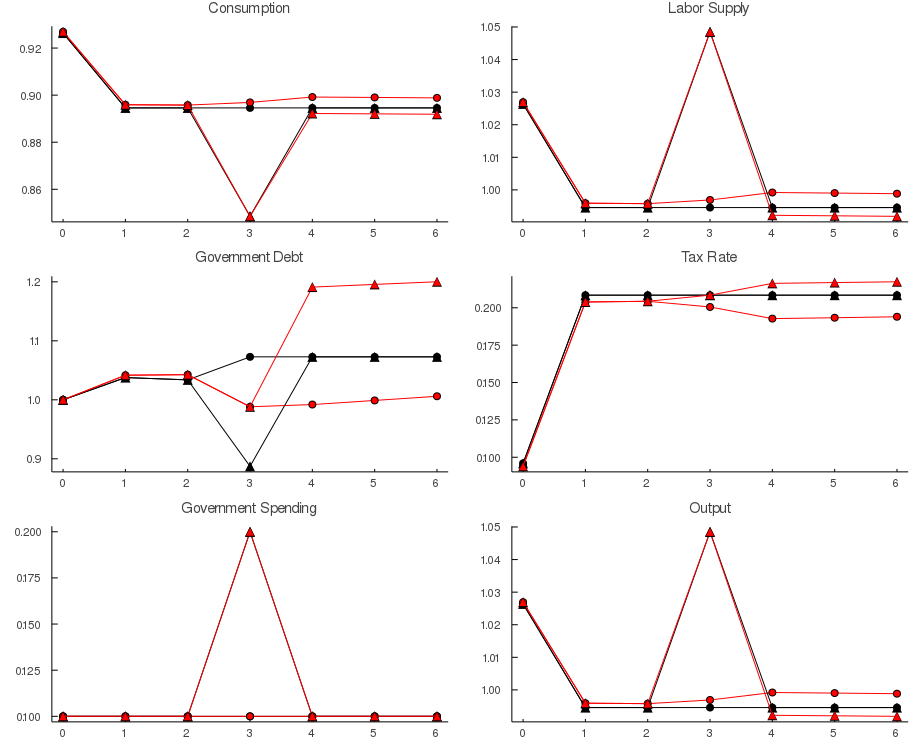

In [6]:
time_example = crra_utility(G=[0.1, 0.1, 0.1, 0.2, 0.1, 0.1],
                            Θ = ones(6)) # Θ à princípio pode ser aleatório

time_example.Π = [ 0.0 1.0 0.0 0.0 0.0 0.0;
                   0.0 0.0 1.0 0.0 0.0 0.0;
                   0.0 0.0 0.0 0.5 0.5 0.0;
                   0.0 0.0 0.0 0.0 0.0 1.0;
                   0.0 0.0 0.0 0.0 0.0 1.0;
                   0.0 0.0 0.0 0.0 0.0 1.0]

# Inicialize μgrid para iteração da função de valor
μgrid = range(-0.7, 0.01, length = 200)

time_example.transfers = true  # Governo pode usar transferências
time_sequential = SequentialAllocation(time_example) # Resolver o problema sequencial

time_bellman = RecursiveAllocation(time_example, μgrid)

sHist_h = [1, 2, 3, 4, 6, 6, 6]
sHist_l = [1, 2, 3, 5, 6, 6, 6]

sim_seq_h = simulate(time_sequential, 1., 1, 7, sHist_h)
sim_bel_h = simulate(time_bellman, 1., 1, 7, sHist_h)
sim_seq_l = simulate(time_sequential, 1., 1, 7, sHist_l)
sim_bel_l = simulate(time_bellman, 1., 1, 7, sHist_l)

using Plots
gr(fmt=:png);
titles = hcat("Consumption", "Labor Supply", "Government Debt",
              "Tax Rate", "Government Spending", "Output")
sim_seq_l_plot = hcat(sim_seq_l[1:3]..., sim_seq_l[4],
                      time_example.G[sHist_l],
                      time_example.Θ[sHist_l] .* sim_seq_l[2])
sim_bel_l_plot = hcat(sim_bel_l[1:3]..., sim_bel_l[5],
                      time_example.G[sHist_l],
                      time_example.Θ[sHist_l] .* sim_bel_l[2])
sim_seq_h_plot = hcat(sim_seq_h[1:3]..., sim_seq_h[4],
                      time_example.G[sHist_h],
                      time_example.Θ[sHist_h] .* sim_seq_h[2])
sim_bel_h_plot = hcat(sim_bel_h[1:3]..., sim_bel_h[5],
                      time_example.G[sHist_h],
                      time_example.Θ[sHist_h] .* sim_bel_h[2])
p = plot(size = (920, 750), layout =(3, 2),
 xaxis=(0:6), grid=false, titlefont=Plots.font("sans-serif", 10))
plot!(p, title = titles)
for i=1:6
    plot!(p[i], 0:6, sim_seq_l_plot[:, i], marker=:circle, color=:black, lab="")
    plot!(p[i], 0:6, sim_bel_l_plot[:, i], marker=:circle, color=:red, lab="")
    plot!(p[i], 0:6, sim_seq_h_plot[:, i], marker=:utriangle, color=:black, lab="")
    plot!(p[i], 0:6, sim_bel_h_plot[:, i], marker=:utriangle, color=:red, lab="")
end
p

Como um planejador de Ramsey responde à guerra depende da estrutura do mercado de ativos.

Se ele é capaz de negociar dívidas contingentes do estado, então no momento $ t = 2 $

- o governo adquire um título Arrow que compensa quando $ g_3 = g_h $
- o governo vende um título da Arrow que compensa quando $ g_3 = g_l $
- Essas compras são projetadas de tal maneira que, independentemente de haver ou não uma guerra de US $ t = 3 $, o governo começará o período de US $ t = 4 $ com a *mesma* dívida do governo.


Esse padrão facilita a alocação de taxas nos estados.

O governo sem dívida contingente do Estado não pode fazer isso.

Em vez disso, ele deve inserir o tempo $ t = 3 $ com o mesmo nível de dívida vencendo, se houver paz ou guerra em $ t = 3 $.

Ele responde a essa restrição suavizando as taxas de imposto ao longo do tempo.

Para financiar uma guerra, aumenta impostos e emite mais dívidas.

Para atender ao ônus da dívida adicional, aumenta os impostos em todos os períodos futuros.

A ausência de dívida contingente estatal leva a uma diferença importante na
política tributária ideal.

Quando o planejador de Ramsey tem acesso à dívida contingente do estado, o imposto ideal
política é história independente:

- A taxa de imposto depende apenas do nível atual de gastos do governo,
  dado o multiplicador Lagrange na restrição de implementabilidade.


Sem dívida contingente do estado, a taxa ideal de imposto depende do histórico.

- Uma guerra no momento $ t = 3 $ causa um aumento permanente na taxa de imposto.  

#### Alerta perpétuo de guerra

A dependência da história ocorre mais dramaticamente em um caso em que o governo
perpetuamente enfrenta a perspectiva de guerra.

Este caso foi estudado no exemplo final da aula sobre
[tributação ótima com dívida contingente do estado](https://julia.quantecon.org/opt_tax_recur.html).

Lá, a cada período o governo enfrenta uma probabilidade constante, de US $ 0,5 $, de guerra.

Além disso, este exemplo apresenta as seguintes preferências

$$
u(c,n) = \log(c) + 0.69 \log(1-n)
$$

De acordo, redefiniremos nossa função de utilidade:

In [7]:
function log_utility(;β = 0.9,
                    ψ = 0.69,
                    Π = 0.5 * ones(2, 2),
                    G = [0.1, 0.2],
                    Θ = ones(2),
                    transfers = false)
    # Derivadas da função utilidade
    U(c,n) = log(c) + ψ * log(1 - n)
    Uc(c,n) = 1 ./ c
    Ucc(c,n) = -c.^(-2.0)
    Un(c,n) = -ψ ./ (1.0 .- n)
    Unn(c,n) = -ψ ./ (1.0 .- n).^2.0
    n_less_than_one = true
    return Model(β, Π, G, Θ, transfers,
                U, Uc, Ucc, Un, Unn, n_less_than_one)
end

log_utility (generic function with 1 method)

Com essas preferências, as taxas de imposto de Ramsey variam mesmo na Lucas-Stokey
modelo com dívida contingente do estado.

A figura abaixo traça políticas tributárias ideais para a economia com
dívidas contingentes estatais (círculos) e a economia com apenas uma obrigação livre de risco
(triângulos):

diff = 0.0007972378476372139
diff = 0.0006423560333504441
diff = 0.0005517441622530832
diff = 0.00048553930013351857
diff = 0.0004226590836939342
diff = 0.00037550672316976404
diff = 0.0003294032122270672
diff = 0.00029337232321718974
diff = 0.00025856795048240623
diff = 0.00023042624865279873
diff = 0.0002031214087191915
diff = 0.00018115282833643646
diff = 0.00016034374751970243
diff = 0.00014294960573402432
diff = 0.0001267581715890033
diff = 0.00011295205489914281
diff = 0.00010030878977062024
diff = 8.934103186095062e-5


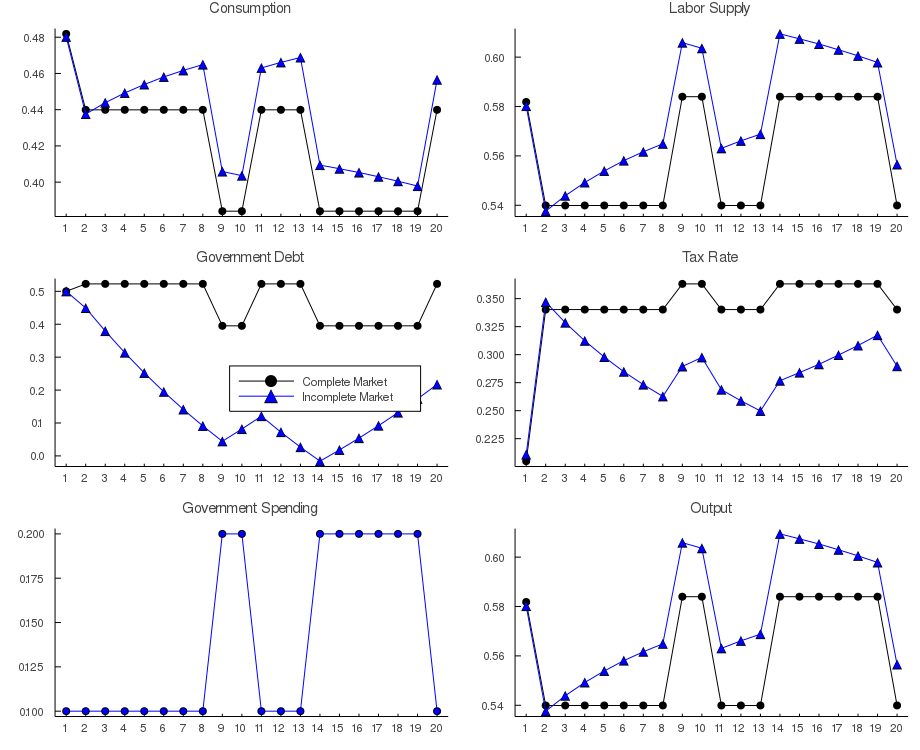

In [8]:
log_example = log_utility()

log_example.transfers = true                             # Governo pode usar transferências
log_sequential = SequentialAllocation(log_example)       # Resolver o problema da sequência
log_bellman = RecursiveAllocation(log_example, μgrid)    # Resolver o problema recursivo

T = 20
sHist = [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 2, 2, 2, 2, 1]

#simular
sim_seq = simulate(log_sequential, 0.5, 1, T, sHist)
sim_bel = simulate(log_bellman, 0.5, 1, T, sHist)

sim_seq_plot = hcat(sim_seq[1:3]...,
            sim_seq[4], log_example.G[sHist], log_example.Θ[sHist] .* sim_seq[2])
sim_bel_plot = hcat(sim_bel[1:3]...,
            sim_bel[5], log_example.G[sHist], log_example.Θ[sHist] .* sim_bel[2])

#plotar políticas
p = plot(size = (920, 750), layout = grid(3, 2),
         xaxis=(0:T), grid=false, titlefont=Plots.font("sans-serif", 10))
labels = fill(("", ""), 6)
labels[3] = ("Complete Market", "Incomplete Market")
plot!(p, title = titles)
for i = vcat(collect(1:4), 6)
    plot!(p[i], sim_seq_plot[:, i], marker=:circle, color=:black, lab=labels[i][1])
    plot!(p[i], sim_bel_plot[:, i], marker=:utriangle, color=:blue, lab=labels[i][2],
          legend=:bottomright)
end
plot!(p[5], sim_seq_plot[:, 5], marker=:circle, color=:blue, lab="")

Quando o governo experimenta um período prolongado de paz, é capaz de reduzir
dívida pública e estabeleça taxas tributárias permanentemente mais baixas.

No entanto, o governo financia uma longa guerra através de empréstimos e aumento de impostos.

Isso resulta em um afastamento das políticas com dívidas contingentes estatais que
depende da história dos choques.

Isso é ainda mais evidente na figura a seguir, que representa a evolução do
as duas políticas ao longo de 200 períodos:

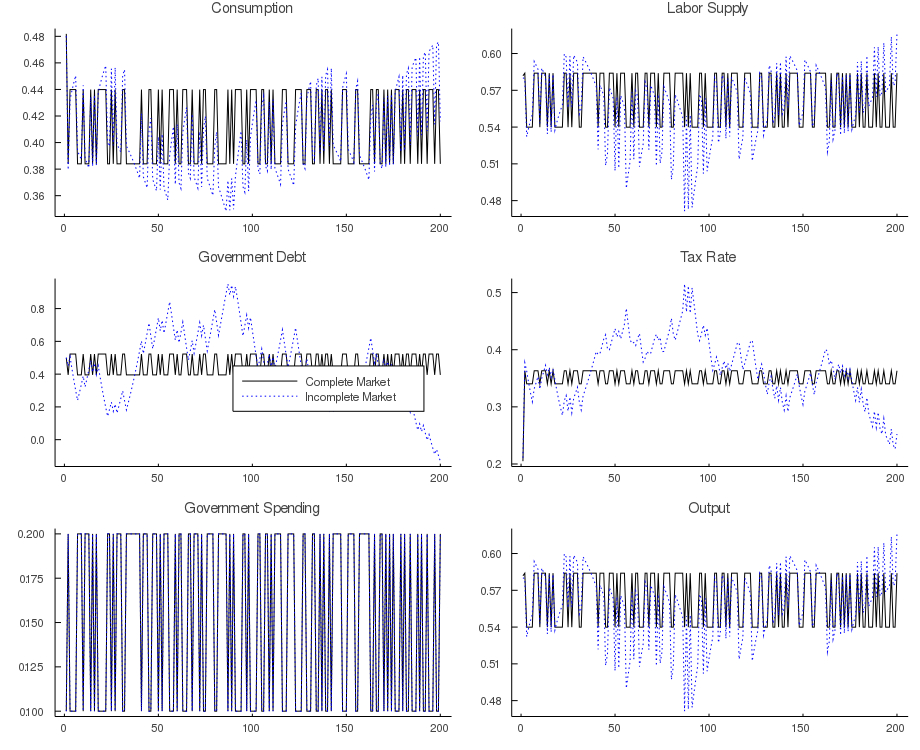

In [9]:
T_long = 200
sim_seq_long = simulate(log_sequential, 0.5, 1, T_long)
sHist_long = sim_seq_long[end-2]
sim_bel_long = simulate(log_bellman, 0.5, 1, T_long, sHist_long)
sim_seq_long_plot = hcat(sim_seq_long[1:4]...,
             log_example.G[sHist_long], log_example.Θ[sHist_long] .* sim_seq_long[2])
sim_bel_long_plot = hcat(sim_bel_long[1:3]..., sim_bel_long[5],
             log_example.G[sHist_long], log_example.Θ[sHist_long] .* sim_bel_long[2])

p = plot(size = (920, 750), layout = (3, 2), xaxis=(0:50:T_long), grid=false,
         titlefont=Plots.font("sans-serif", 10))
plot!(p, title = titles)
for i = 1:6
    plot!(p[i], sim_seq_long_plot[:, i], color=:black, linestyle=:solid, lab=labels[i][1])
    plot!(p[i], sim_bel_long_plot[:, i], color=:blue, linestyle=:dot, lab=labels[i][2],
          legend=:bottomright)
end
p

** Notas de rodapé **

<p> <a id=fn-a href=#fn-a-link> <strong> [1] </strong> </a> Em uma alocação que resolve o problema de Ramsey e que cobra distorção
impostos sobre o trabalho, por que o governo iria querer devolver as receitas
para o setor privado? Isso não aconteceria em uma economia com dívida contingente do Estado, já que
essa alocação poderia ser melhorada através da redução de impostos distorcidos
em vez de distribuir transferências fixas. Mas sem contingente estatal
dívida pode haver circunstâncias em que um governo gostaria de fazer
transferências fixas para o setor privado.

<p> <a id=fn-b href=#fn-b-link> <strong> [2] </strong> </a> Das condições de primeira ordem para o Ramsey
problema, existe outra realização $ \tilde s ^ t $ com
o mesmo histórico até o período anterior, ou seja, $ \tilde s ^ {t-1} =
s ^ {t-1} $, mas onde o multiplicador na restrição (11) assume um valor positivo, então
$ \gamma_t (\tilde s ^ t)> 0 $.